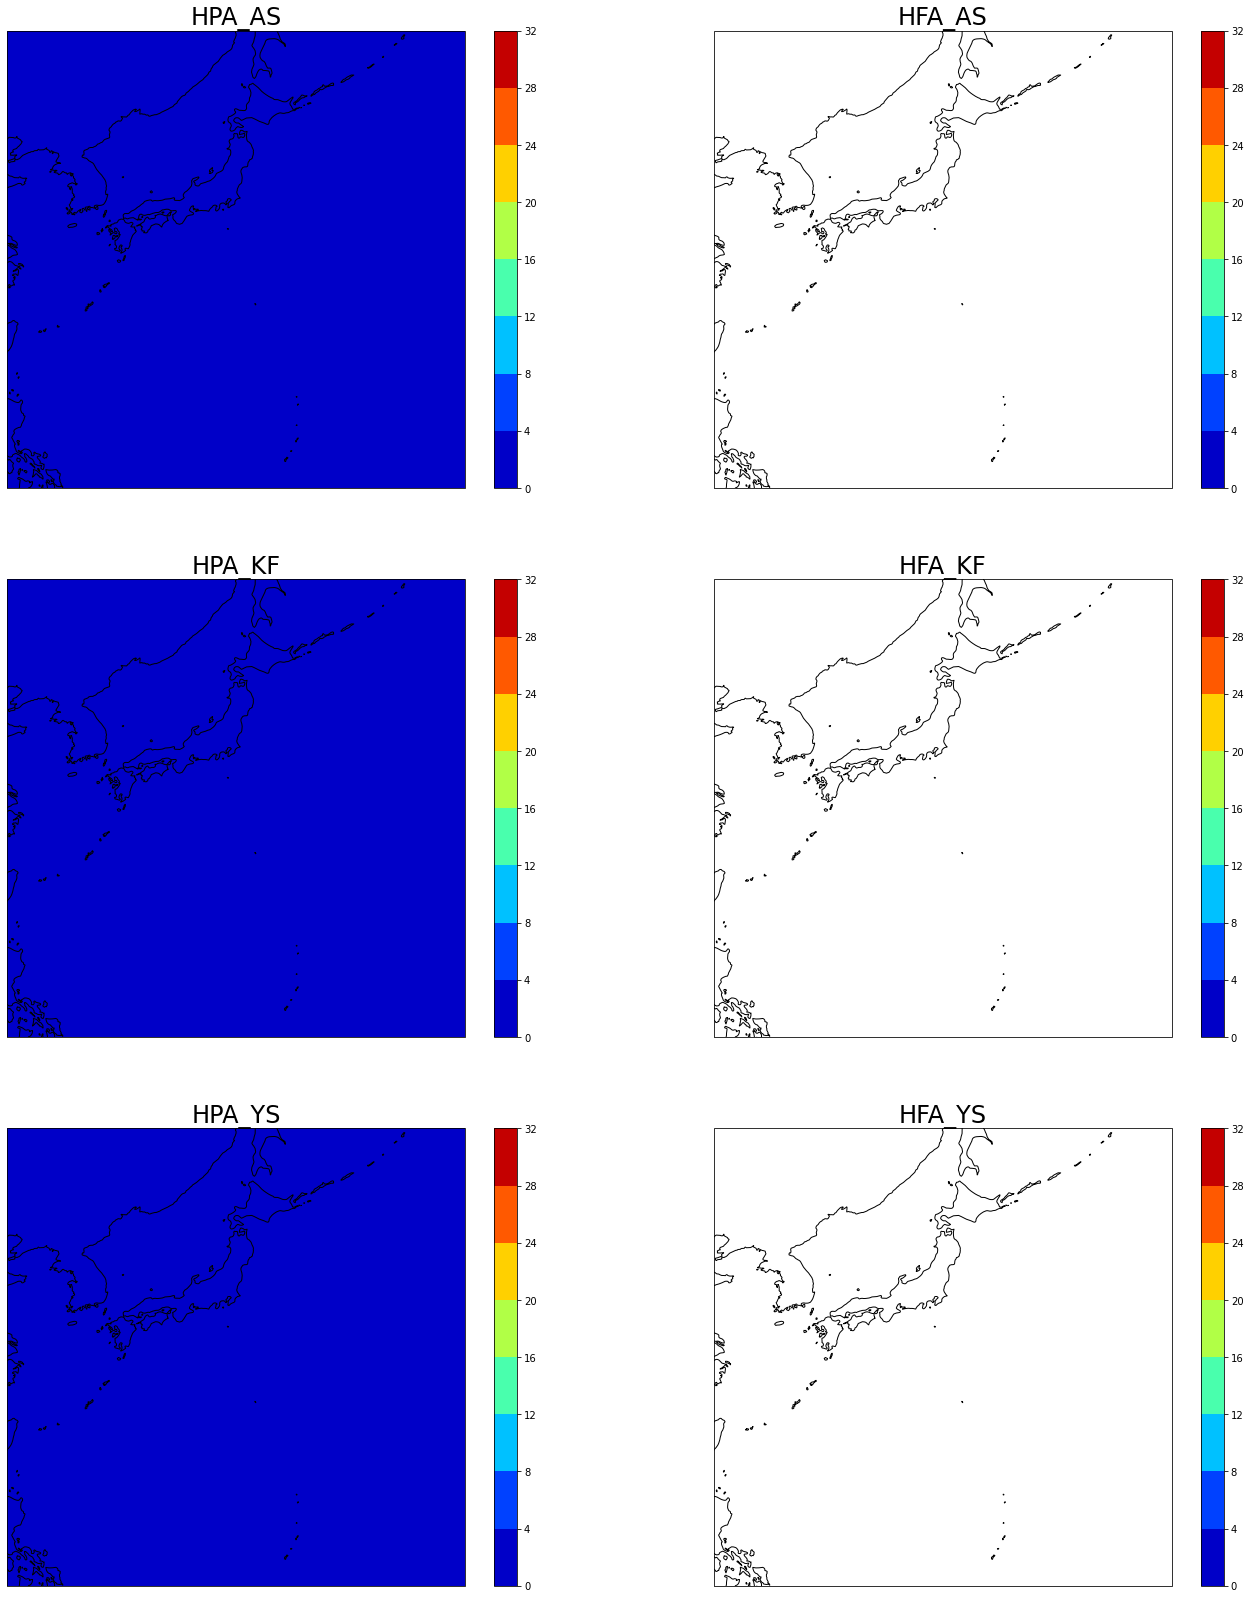

HFA_ASで18m以上の地点： 6241 箇所
HFA_ASで-18m以下の地点： 0 箇所
HFA_KFで18m以上の地点： 6241 箇所
HFA_KFで-18m以下の地点： 0 箇所
HFA_YSで18m以上の地点： 6241 箇所
HFA_YSで-18m以下の地点： 0 箇所


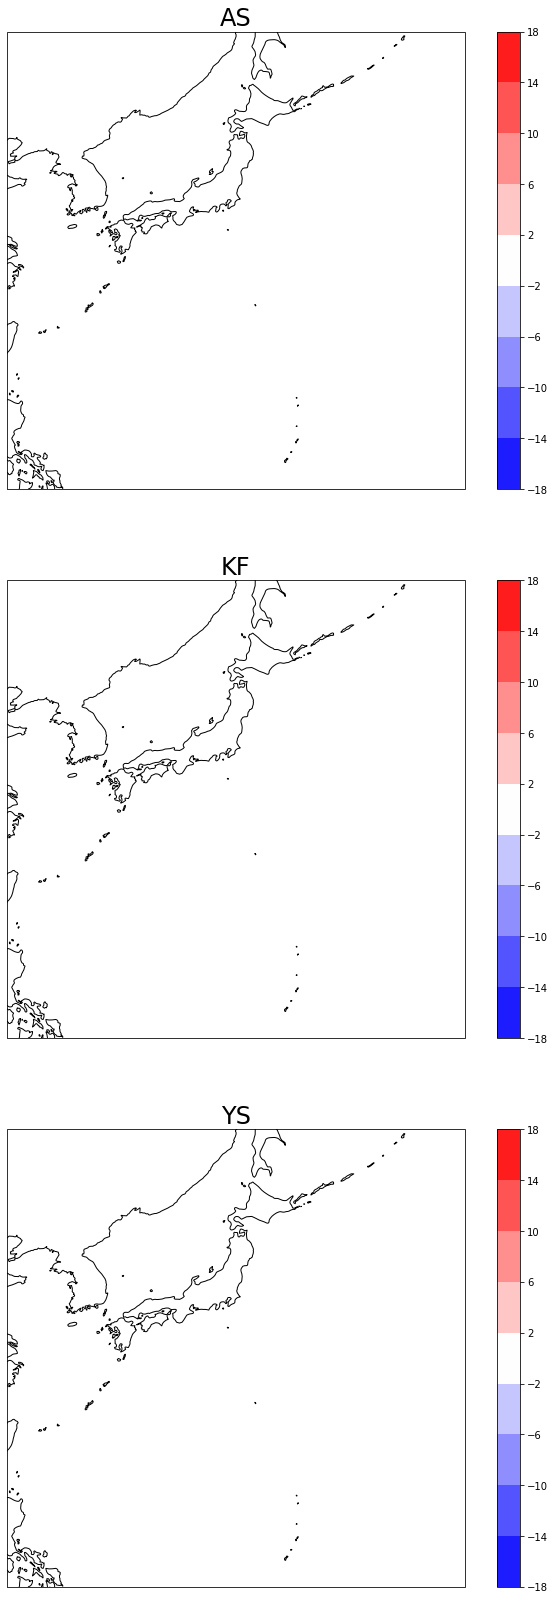

In [33]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl


"""モデル間のRV比較の図を出力"""

MODEL = ['AS', 'KF', 'YS']

with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

lat_s = lats[0][0]
lat_n = lats[0][-1]
lon_w = lons[0][0]
lon_e = lons[-1][0]

DATA_F = []
DATA_P = []

with open('HFA_AS_c0.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_F.append(list(csv_reader))
with open('HPA_AS.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_P.append(list(csv_reader))
with open('HFA_KF_c0.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_F.append(list(csv_reader))
with open('HPA_KF.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_P.append(list(csv_reader))
with open('HFA_YS_c0.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_F.append(list(csv_reader))
with open('HPA_YS.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    DATA_P.append(list(csv_reader))

# str → float
for i in range(79):
    for j in range(79):
        for k in range(3):
            DATA_F[k][i][j] = float(100)
            DATA_P[k][i][j] = float(0)

for i in range(3):
    DATA_F[i] = np.array(DATA_F[i])
    DATA_P[i] = np.array(DATA_P[i])

# 描画(現在気候のRV)
fig = plt.figure(figsize=(20, 24))
levels = np.arange(0, 33, 4)
ax1 = fig.add_subplot(3, 2, 1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, DATA_P[0], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax1.coastlines()
ax1.set_title('HPA_' + MODEL[0], fontsize=24)

ax2 = fig.add_subplot(3, 2, 3, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_P[1], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax2.coastlines()
ax2.set_title('HPA_' + MODEL[1], fontsize=24)

ax3 = fig.add_subplot(3, 2, 5, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_P[2], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax3.coastlines()
ax3.set_title('HPA_' + MODEL[2], fontsize=24)

# 描画(将来気候のRV)
ax4 = fig.add_subplot(3, 2, 2, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, DATA_F[0], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax4.coastlines()
ax4.set_title('HFA_' + MODEL[0], fontsize=24)

ax5 = fig.add_subplot(3, 2, 4, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[1], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax5.coastlines()
ax5.set_title('HFA_' + MODEL[1], fontsize=24)

ax6 = fig.add_subplot(3, 2, 6, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[2], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax6.coastlines()
ax6.set_title('HFA_' + MODEL[2], fontsize=24)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("現在気候と将来気候の100年再現期待値.png")
plt.show()

# 描画(将来気候と現在気候の最大波高の差)
print("HFA_ASで18m以上の地点：", len(np.where(DATA_F[0] - DATA_P[0] > 18)[0]), "箇所")
print("HFA_ASで-18m以下の地点：", len(np.where(DATA_F[0] - DATA_P[0] < -18)[0]), "箇所")
print("HFA_KFで18m以上の地点：", len(np.where(DATA_F[1] - DATA_P[1] > 18)[0]), "箇所")
print("HFA_KFで-18m以下の地点：", len(np.where(DATA_F[1] - DATA_P[1] < -18)[0]), "箇所")
print("HFA_YSで18m以上の地点：", len(np.where(DATA_F[2] - DATA_P[2] > 18)[0]), "箇所")
print("HFA_YSで-18m以下の地点：", len(np.where(DATA_F[2] - DATA_P[2] < -18)[0]), "箇所")
fig = plt.figure(figsize=(10, 24))
levels = np.arange(-18, 19, 4)
cmap = mpl.cm.get_cmap("bwr").copy() # 色テーブル取得
cmap.set_under() # 下限を下回った場合に灰色
cmap.set_over() # 上限を超えた場合に白
print(cmap)
ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, DATA_F[0] - DATA_P[0], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap)
c_bar = plt.colorbar(a)
ax1.coastlines()
ax1.set_title(MODEL[0], fontsize=24)

ax2 = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[1] - DATA_P[1], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap)
c_bar = plt.colorbar(a)
ax2.coastlines()
ax2.set_title(MODEL[1], fontsize=24)

ax3 = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[2] - DATA_P[2], levels=levels, transform=ccrs.PlateCarree(), cmap=cmap)
c_bar = plt.colorbar(a)
ax3.coastlines()
ax3.set_title(MODEL[2], fontsize=24)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("100年再現期待値の変化.png")
plt.show()